

# Problem statement:-

<b> In telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.</b><br>

# Objective:-
   <b>Inorder to retain customer we build a model to predict if a customer will churn or not and analyze factors that indicates churning.Prediction is done for top 30% of customer  since major portion of revenue comes from these customers.</b>

<font color='red'><b>There is a popup showing "Note validation failed" error when the notebook is being saved, this occured after working with notebook on visual studio code. However this doesnt affect the execution of jupyter notebook.</b></font>

<b>Importing necessary packages</b>

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dataclass_transform

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dataclass_transform (from versions: none)
ERROR: No matching distribution found for dataclass_transform


In [5]:
pip install statsmodels

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz
import datetime
import statsmodels.api as sm
import math  
import warnings

from pandas_profiling import ProfileReport
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,recall_score,f1_score
from sklearn.linear_model import RidgeClassifier , LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.utils import class_weight
from IPython.display import Image  

ModuleNotFoundError: No module named 'sklearn.externals.six'

<b>Commands to ignore warnings and to display all rows and columns of DataFrame</b>

In [ ]:
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

<b>Loading data from csv file into DataFrame</b>

In [4]:
Telecom_DF=pd.read_csv("/Users/hariharan/Desktop/Telecom churn /telecom_churn_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hariharan/Desktop/Telecom churn /telecom_churn_data.csv'

Telecom_DF - Telecom Data Frame

<b>Printing out shape of the DataFrame</b>

In [ ]:
Telecom_DF.shape

(99999, 226)

<b>Analysing list of columns present in DataFrame</b>

In [ ]:
Telecom_DF.columns

#below code was actually used to view all columns , commented since the list is big
#[x for x in Telecom_DF.columns]

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

<b>Selecting top 5 rows of the the DataFrame</b>

In [ ]:
Telecom_DF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

<b>Analyzing Datatype and null value if present for each column.</b>

In [ ]:
Telecom_DF.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

<b>Checking for duplicated rows in the Data Frame</b>

In [ ]:
Telecom_DF.duplicated().sum()

0

<b>Making float type rounded to 2 decimals</b>

In [ ]:
float_col_lst=Telecom_DF.select_dtypes(np.float).columns

Telecom_DF[float_col_lst]=round(Telecom_DF[float_col_lst],2)

float_col_lst - Float column list

<b>Converting date columns from object to DateTime datatype</b>

In [ ]:
date_col_lst=[col for col in Telecom_DF.columns if 'date' in col]

Telecom_DF[date_col_lst]=Telecom_DF[date_col_lst].apply(pd.to_datetime)

date_col_lst - Date column list

Note :- As verified with guide @ upgrad, arpu columns can have negative values.

<b>Listing out columns which has null values above the acceptable threshold</b>

Note:- 20% is considered as threshold line for listing out columns with high NULL value

In [ ]:
null_col_lst=Telecom_DF.isnull().sum(axis=0)/len(Telecom_DF)
high_null_col_lst=null_col_lst[null_col_lst>0.2]
high_null_col_lst

date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
total_rech_data_6           0.748467
total_rech_data_7           0.744287
total_rech_data_8           0.736607
total_rech_data_9           0.740777
max_rech_data_6             0.748467
max_rech_data_7             0.744287
max_rech_data_8             0.736607
max_rech_data_9             0.740777
count_rech_2g_6             0.748467
count_rech_2g_7             0.744287
count_rech_2g_8             0.736607
count_rech_2g_9             0.740777
count_rech_3g_6             0.748467
count_rech_3g_7             0.744287
count_rech_3g_8             0.736607
count_rech_3g_9             0.740777
av_rech_amt_data_6          0.748467
av_rech_amt_data_7          0.744287
av_rech_amt_data_8          0.736607
av_rech_amt_data_9          0.740777
arpu_3g_6                   0.748467
arpu_3g_7                   0.744287
arpu_3g_8                   0.736607
a

null_col_lst - list of column containing null values

high_null_col_lst - list of column containing more than 20% null values

Note:- 
From above values it can be observed that columns belonging to data consumption have high missing values , and also for a specific month same count of values is missing for all data columns.<br><br>
It makes sense that null value means the user has not availed data service,which may explain high percentage of null value present.<br><br>
It has been verified with the Assignment guide that it is safe to make this assumption.

<b>Replacing null values with 0 for the above continous columns</b>

In [ ]:
null_cont_col_lst=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8',
                   'max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                   'count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8',
                   'arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

Telecom_DF[null_cont_col_lst]=Telecom_DF[null_cont_col_lst].fillna(0)

null_cont_col_lst - list of continuous columns with high null value

<b>Replacing null values with "NA" for the above categorical columns</b>

Note:- For categorical columns there is already a category as 0 , hence hence replacing blank columns with "NA" to denote the value is not known.

In [ ]:
null_cat_col_lst=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

Telecom_DF[null_cat_col_lst]=Telecom_DF[null_cat_col_lst].fillna('NA')

cat_col_lst - Categorical column list

<b>Removing Date columns that has high null value</b>

Note:- for Date columns there is no value with which null values can be replaced with , since proportion of null value is high we are dropping it.

In [ ]:
Telecom_DF.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1,inplace=True)

In [ ]:
Telecom_DF

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.

Note:- from the analysis of the above data frame , following conclusion has been arrived upon

<b>Null value treatment for derived columns</b><br><br>

from the analysis of derived column's data , following conclusion has been arrived upon,(m - stands for month)<br><br>
loc_og_mou_m = loc_og_t2t_mou_m + loc_og_t2m_mou_m + loc_og_t2f_mou_m + loc_og_t2c_mou_m <br><br>
std_og_mou_m = std_og_t2t_mou_m + std_og_t2m_mou_m + std_og_t2f_mou_m + std_og_t2c_mou_m <br><br>
total_og_mou_m = loc_og_mou_m + std_og_mou_m + isd_og_mou_m + spl_og_mou_m + og_others_m <br><br>
loc_ic_mou_m = loc_ic_t2t_mou_m + loc_ic_t2m_mou_m + loc_ic_t2f_mou_m  <br><br>
std_ic_mou_m = std_ic_t2t_mou_m + std_ic_t2m_mou_m + std_ic_t2f_mou_m  <br><br>
total_ic_mou_m = loc_ic_mou_m + std_ic_mou_m + isd_ic_mou_m + spl_ic_mou_m + ic_others_m <br><br>
total_rech_data_m = count_rech_2g_m + count_rech_3g_m <br><br>

no such derivation can be arrived upon for 'arpu%' columns and for av_rech_amt_data_m .<br><br>

"t2o"( Operator T to other operator fixed line)columns are not included since all the values of the columns is either 0 or blank .<br><br>

another important observation is that user only can make call to call-center and not vice versa , since there is no column with "ic"(incoming call) and "t2c"(operator T to call center) together .<br><br>

columns "total_og_mou_m" , "total_ic_mou_m" , "total_rech_data_m" has 0 null values,so they are not processed

In [ ]:
print(Telecom_DF['loc_og_mou_6'].isnull().sum())
print(Telecom_DF['loc_og_mou_7'].isnull().sum())
print(Telecom_DF['loc_og_mou_8'].isnull().sum())
print(Telecom_DF['std_og_mou_6'].isnull().sum())
print(Telecom_DF['std_og_mou_7'].isnull().sum())
print(Telecom_DF['std_og_mou_8'].isnull().sum())
print(Telecom_DF['total_og_mou_6'].isnull().sum())
print(Telecom_DF['total_og_mou_7'].isnull().sum())
print(Telecom_DF['total_og_mou_8'].isnull().sum())
print(Telecom_DF['loc_ic_mou_6'].isnull().sum())
print(Telecom_DF['loc_ic_mou_7'].isnull().sum())
print(Telecom_DF['loc_ic_mou_8'].isnull().sum())
print(Telecom_DF['std_ic_mou_6'].isnull().sum())
print(Telecom_DF['std_ic_mou_7'].isnull().sum())
print(Telecom_DF['std_ic_mou_8'].isnull().sum())
print(Telecom_DF['total_ic_mou_6'].isnull().sum())
print(Telecom_DF['total_ic_mou_7'].isnull().sum())
print(Telecom_DF['total_ic_mou_8'].isnull().sum())

3937
3859
5378
3937
3859
5378
0
0
0
3937
3859
5378
3937
3859
5378
0
0
0


In [ ]:
#other mentioned columns are not treated since they have 0 null values

deriv_col_map=(('loc_og_mou_' , ('loc_og_t2t_mou_','loc_og_t2m_mou_','loc_og_t2f_mou_','loc_og_t2c_mou_')),
            ('std_og_mou_' , ('std_og_t2t_mou_' , 'std_og_t2m_mou_' , 'std_og_t2f_mou_' , 'std_og_t2c_mou_' )),
            ('loc_ic_mou_' , ('loc_ic_t2t_mou_' , 'loc_ic_t2m_mou_' , 'loc_ic_t2f_mou_')),
            ('std_ic_mou_' , ('std_ic_t2t_mou_' , 'std_ic_t2m_mou_' , 'std_ic_t2f_mou_'))
            )


def deriv_col_null_treat(row):
    for i in range(6,9):
        for j in range(0,len(deriv_col_map)):
            if(pd.isnull(row[deriv_col_map[j][0]+str(i)])):
                if(not row[[x+str(i) for x in deriv_col_map[j][1]]].isnull().any()):
                    row[deriv_col_map[j][0]+str(i)]=row[[x+str(i) for x in deriv_col_map[j][1]]].sum()
    return row

Telecom_DF=Telecom_DF.apply(lambda row:deriv_col_null_treat(row),axis=1)

deriv_col_map - list containing mapping of derived columns to original columns

deriv_col_null_treat() - function to treat null values for derived columns ,by adding original column values for derived columns

In [ ]:
print(Telecom_DF['loc_og_mou_6'].isnull().sum())
print(Telecom_DF['loc_og_mou_7'].isnull().sum())
print(Telecom_DF['loc_og_mou_8'].isnull().sum())
print(Telecom_DF['std_og_mou_6'].isnull().sum())
print(Telecom_DF['std_og_mou_7'].isnull().sum())
print(Telecom_DF['std_og_mou_8'].isnull().sum())
print(Telecom_DF['total_og_mou_6'].isnull().sum())
print(Telecom_DF['total_og_mou_7'].isnull().sum())
print(Telecom_DF['total_og_mou_8'].isnull().sum())
print(Telecom_DF['loc_ic_mou_6'].isnull().sum())
print(Telecom_DF['loc_ic_mou_7'].isnull().sum())
print(Telecom_DF['loc_ic_mou_8'].isnull().sum())
print(Telecom_DF['std_ic_mou_6'].isnull().sum())
print(Telecom_DF['std_ic_mou_7'].isnull().sum())
print(Telecom_DF['std_ic_mou_8'].isnull().sum())
print(Telecom_DF['total_ic_mou_6'].isnull().sum())
print(Telecom_DF['total_ic_mou_7'].isnull().sum())
print(Telecom_DF['total_ic_mou_8'].isnull().sum())

3937
3859
5378
3937
3859
5378
0
0
0
3937
3859
5378
3937
3859
5378
0
0
0


Note:- on analysing new NULL value count it is observed that no null value have been replaced

<b>List of columns that has single value throughout</b>

In [ ]:
list(Telecom_DF.columns[Telecom_DF.nunique() <= 1])

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

<b>Dropping of column that only has a single value throughout and no variance</b>

In [ ]:
single_val_col_lst=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                    'last_date_of_month_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',                              'std_ic_t2o_mou_8','std_ic_t2o_mou_9']
Telecom_DF.drop(single_val_col_lst,axis=1,inplace=True)

#   To derive last day of the month ,datetime functions can be used instead of storing the value seperately in a column

single_val_col_lst - list of columns containing only single values

<b>Dropping mobile number column, since it's of no use in analysis.</b>

In [ ]:
Telecom_DF.drop('mobile_number',axis=1,inplace=True)

<b>Filtering out high value customer</b><br><br>
Note:- given in problem that we will be getting 29.9K values , those values are obtained when the data amount is greated than 70th percentile , but in problem statement it is asked to equate to greater than or equal to 70th percentile for which we are getting a value of 30K.

In [ ]:
#Data recharge done for each month is derived using existing columns
Telecom_DF['total_rech_amt_data_6']=Telecom_DF['total_rech_data_6']*Telecom_DF['av_rech_amt_data_6']
Telecom_DF['total_rech_amt_data_7']=Telecom_DF['total_rech_data_7']*Telecom_DF['av_rech_amt_data_7']
Telecom_DF['total_rech_amt_data_8']=Telecom_DF['total_rech_data_8']*Telecom_DF['av_rech_amt_data_8']

Telecom_DF['avg_rech_amt_phs_1']=(Telecom_DF['total_rech_amt_6']+Telecom_DF['total_rech_amt_7']+Telecom_DF['total_rech_amt_data_6']+Telecom_DF['total_rech_amt_data_7'])/4

Telecom_DF=Telecom_DF[Telecom_DF.avg_rech_amt_phs_1 >= Telecom_DF.avg_rech_amt_phs_1.quantile(.70)]
len(Telecom_DF)

30001

<b>Following four columns are used to detect if a customer has churned or not , so checking if null values are present in the columns or not</b>

In [ ]:
print('null values in column total_ic_mou_9 - {}'.format(Telecom_DF.total_ic_mou_9.isnull().sum()))
print('null values in column total_og_mou_9 - {}'.format(Telecom_DF.total_og_mou_9.isnull().sum()))
print('null values in column vol_2g_mb_9 - {}'.format(Telecom_DF.vol_2g_mb_9.isnull().sum()))
print('null values in column vol_3g_mb_9 - {}'.format(Telecom_DF.vol_3g_mb_9.isnull().sum()))

null values in column total_ic_mou_9 - 0
null values in column total_og_mou_9 - 0
null values in column vol_2g_mb_9 - 0
null values in column vol_3g_mb_9 - 0


<b>deriving new column "is_churned" to denote if the customer has churned or not.This is the dependant variable in the problem</b>

In [ ]:
def is_churned(row):
    if((row.total_ic_mou_9==0) &  (row.total_og_mou_9==0) & (row.vol_2g_mb_9==0) & (row.vol_3g_mb_9==0)):
        return 1
    else:
        return 0


Telecom_DF['is_churned'] = Telecom_DF.apply(lambda row : is_churned(row),axis=1)

print("churn count - "+str(len(Telecom_DF[Telecom_DF.is_churned==1])))
print("non churn count - "+str(len(Telecom_DF[Telecom_DF.is_churned==0])))

churn count - 2441
non churn count - 27560


is_churned() - function to calculate if a datapoint has churned or not

<b>Listing out columns belonging to churn phase</b>

In [ ]:
phs_3_col_lst = [col for col in Telecom_DF.columns if '9' in col]+['sep_vbc_3g']
len(phs_3_col_lst)

51

phs_3_col_lst - List of column belonging to phase 3

<b>Removing churn phase columns</b>

In [ ]:
Telecom_DF.drop(phs_3_col_lst,axis=1,inplace=True)

#verifying if the column has been removed or not
[col for col in Telecom_DF.columns if '9' in col]

[]

<b>Count of remaining columns</b>

In [ ]:
len(Telecom_DF.columns)

159

<b>count of rows having NULL values</b>

In [ ]:
Telecom_DF.isnull().any(axis=1).sum()

1838

<b>Removing rows containing NULL values</b>

Note:- since count of Null value rows is much smaller than total row count , it can be safely removed without much loss of information.

In [ ]:
Telecom_DF=Telecom_DF[~Telecom_DF.isnull().any(axis=1)]
len(Telecom_DF)

28163

# Exploratory Data Analysis

<b>Univariate Analysis</b>

Note:- Insights has not been manually derived Since the report in itself is well detailed.Scroll down the result of below cell to find report about each column.

Click on Toogle details button for more details.

In [1]:
ProfileReport(Telecom_DF,minimal=True,progress_bar=False)

NameError: name 'ProfileReport' is not defined

<b>Analysing variation between months of specific features</b><br><br>
note:- pattern difference between months of elemental columns are analyzed

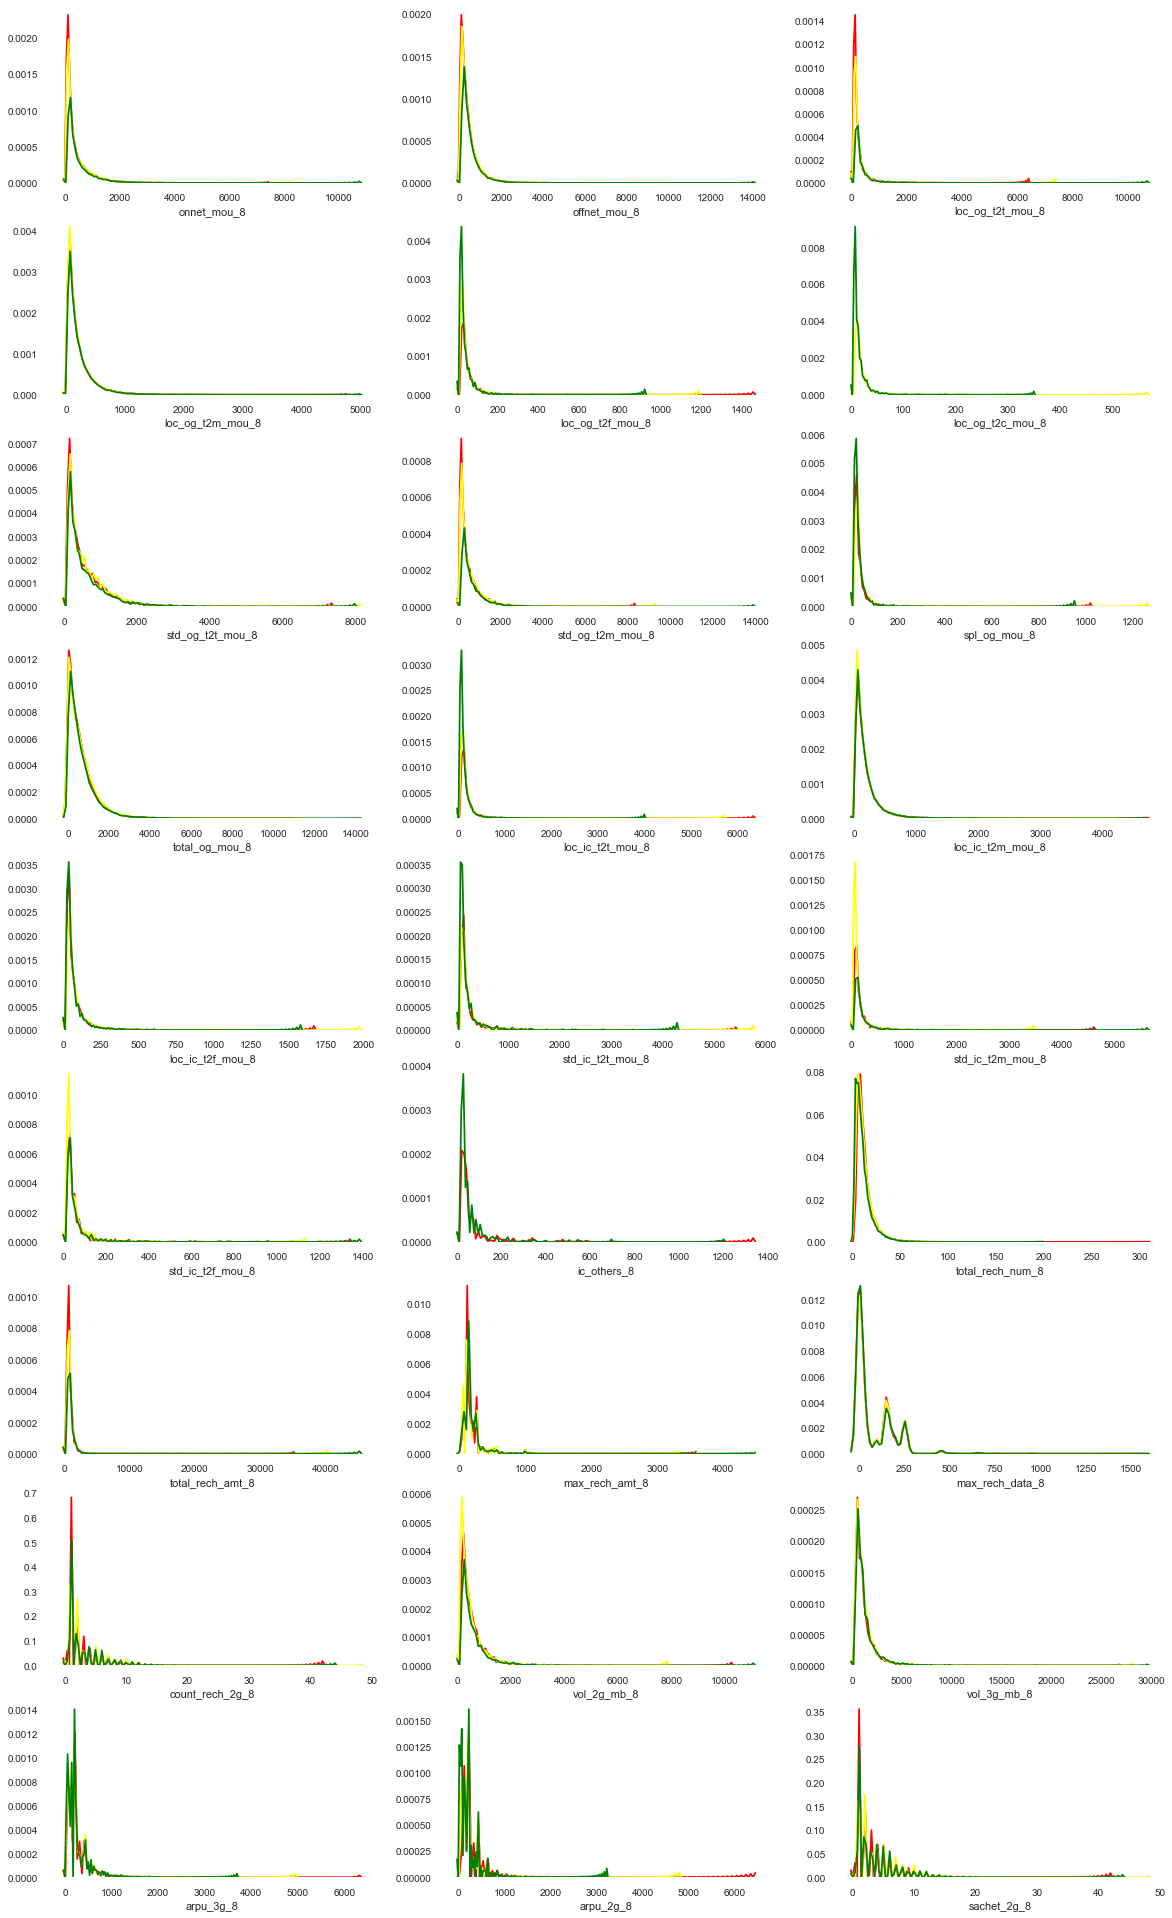

In [ ]:
plt.figure(figsize=(20,50))
mnth_anl_col_lst=['onnet_mou_','offnet_mou_','loc_og_t2t_mou_','loc_og_t2m_mou_','loc_og_t2f_mou_','loc_og_t2c_mou_','std_og_t2t_mou_','std_og_t2m_mou_',
                    'spl_og_mou_','total_og_mou_','loc_ic_t2t_mou_','loc_ic_t2m_mou_','loc_ic_t2f_mou_','std_ic_t2t_mou_','std_ic_t2m_mou_','std_ic_t2f_mou_',
                    'ic_others_','total_rech_num_','total_rech_amt_','max_rech_amt_','max_rech_data_','count_rech_2g_','vol_2g_mb_','vol_3g_mb_','arpu_3g_',
                    'arpu_2g_','sachet_2g_']

for i in range(1,28):
    plt.subplot(13,3,i)
    sns.distplot(Telecom_DF[univar_anl_col_lst[i-1]+'6'], hist=False,color='Red')
    sns.distplot(Telecom_DF[univar_anl_col_lst[i-1]+'7'], hist=False,color='yellow')
    sns.distplot(Telecom_DF[univar_anl_col_lst[i-1]+'8'], hist=False,color='green')

plt.show()

mnth_anl_col_lst - list of columns for which univariate analysis is carried out.includes all 6th,7th and 8th month

<b>Observations from univariate analysis:-</b>
*   for all elemental columns(not derived from other columns) analysed here the distribution pattern is same for 6th , 7th and 8th months.

*   Changes for each month occur at the height of peaks.

*   for all columns spike occurs intially , with the distribution elongated with height close to zero indicating presence of outliers

*   "total_rech_num_m" , "max_rech_data_m" , "vol_3g_mb_m" , "loc_og_t2t_mou_m" , "std_og_t2t_mou_m" , "total_og_mou_m" , "local_ic_t2f_mou" , for all the months of these columns peaks lie around same height

*   "count_rech_2g_m","arpu_3g_m","arpu_2g_m","sachet_2g","max_rech_data_m" , these columns are spiky indicating that there discrete pakcets of values in the distribution.

*   "onnet_mou_m" , "offnet_mou_m" , "loc_og_t2t_mou_m" , "std_og_t2t_mou_m" , "std_og_t2m_mou_m" , "total_og_mou_m" , "vol_2g_mb_m" , for these column month 6 has the highest peak followed by 7 and then 8

*   "loc_og_t2m_mou_m" , "loc_ic_t2m_mou_m" , "std_ic_t2m_mou_m" , "std_ic_t2f_mou_m" , "vol_2g_mb" , for these column month 7 has the highest peak followed by 6 and then 8

*   "loc_og_t2f_mou_m" , "loc_ic_t2t_mou" , for these column month 8 has the highest peak followed by 7 and then 8for these column month 6 has the highest peak followed by 6 and then 8
 


<b>Scatterplot Analysis</b><br><br>
note:-
*   in the distplot observation it is noted that distribution pattern amoung different months of same column remain relatively same.

*   so a single month is taken as representative of all three months and relationsip between each other is observed using pair plot.

*   also there are aggregated columns that contains the summary of set of elemental columns and this is taken instead of elemental column in the set for analysis.

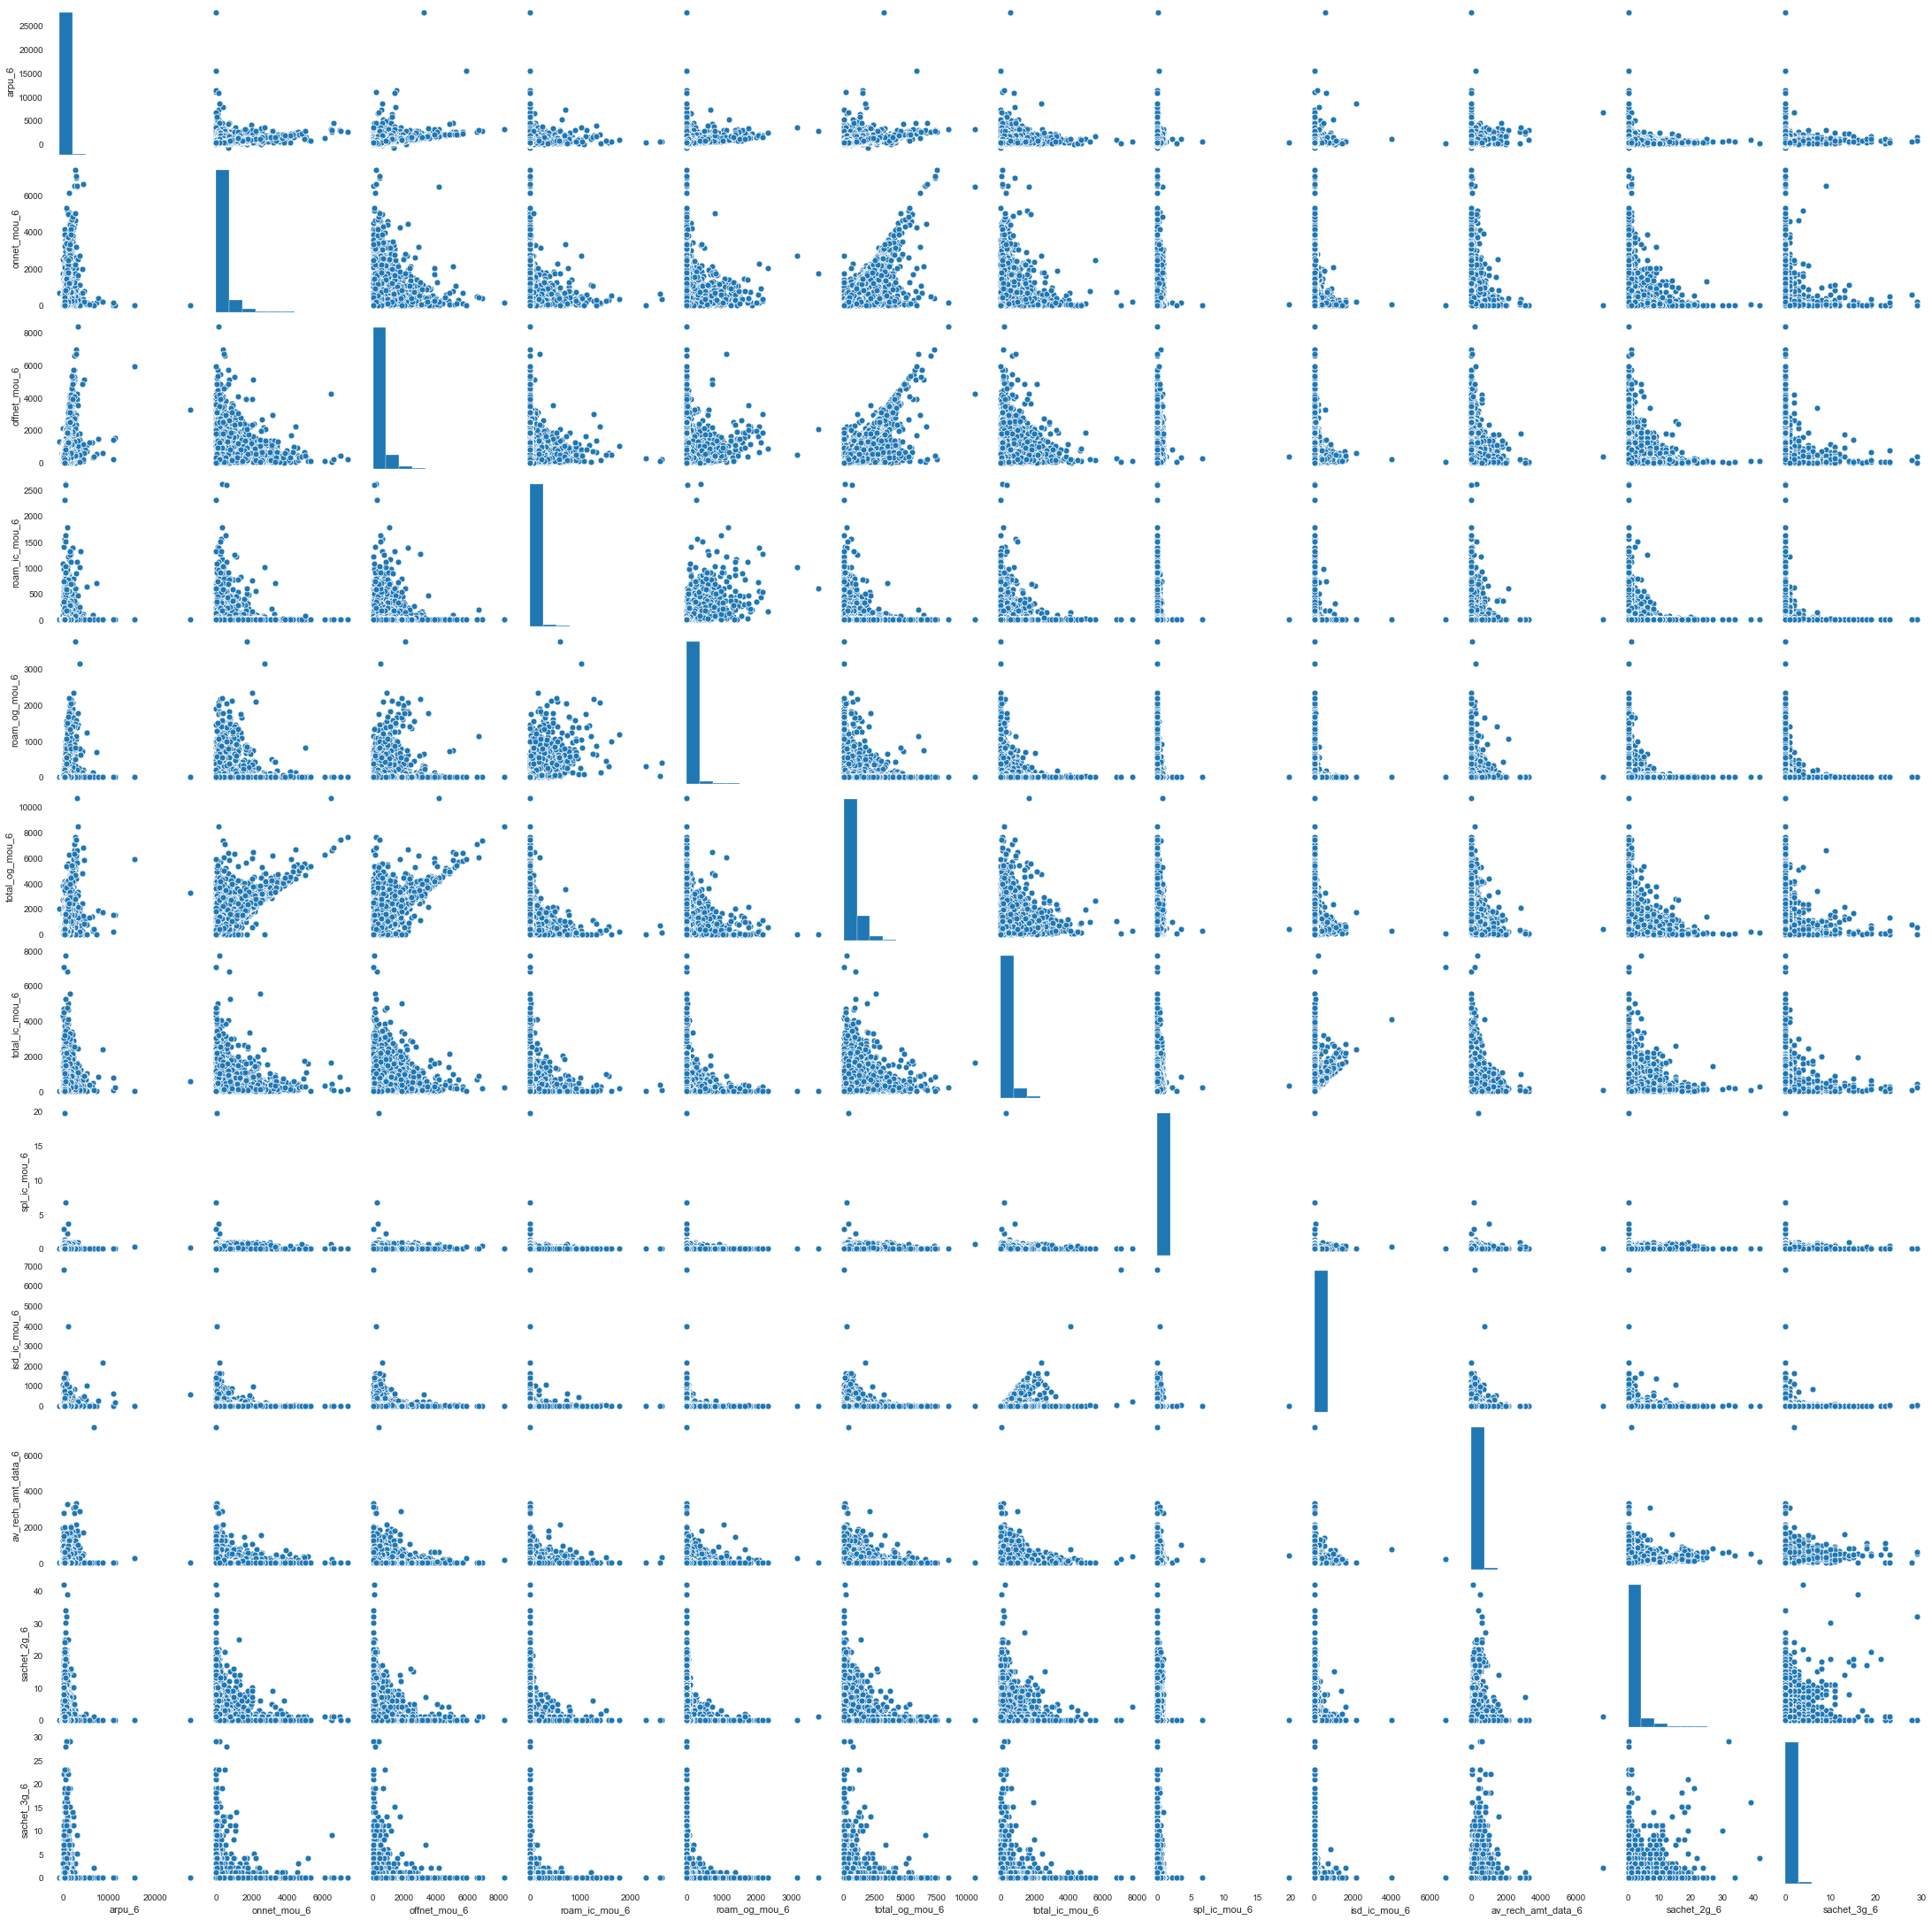

In [ ]:
sumr_col_lst=['arpu_6','onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','total_og_mou_6','total_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6',
              'av_rech_amt_data_6','sachet_2g_6','sachet_3g_6']
sns.pairplot(Telecom_DF[sumr_col_lst])

sumr_col_lst - Summary column list

<b>few observations from the scatter plot are detailed below</b><br><br>
*   as the usage of offnet_mou_m increase minimum value of total_ic_mou_m and arpu_m also increases.

*   as the usage of onnet_mou_m increase minimum value of total_ic_mou_m also increases.

*   as the usage of roam_og_mou_m increase minimum value of arpu_m also increases.

*   as the usage of isd_ic_mou_m increase minimum value of total_ic_mou_m also increases.

*   most of the people have used little special calls and isd_ic_mou_m

*   people from whom company has relatively low revenue have bought high count of 2g and 3g sachet

*   with increase in no. of 2g sachet bought , onnet_mou_m and offnet_mou_m decreases

<b>Correlation between the chosen columns</b>

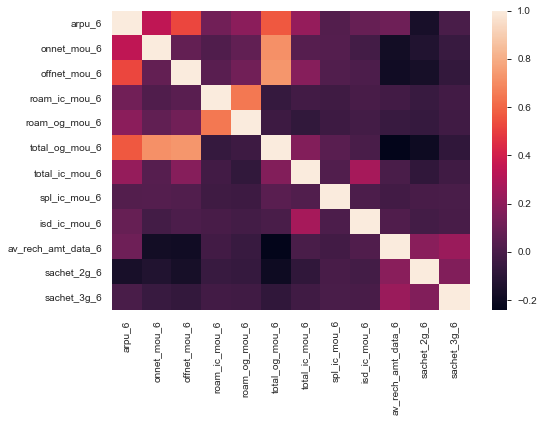

In [ ]:
sns.heatmap(Telecom_DF[sumr_col_lst].corr())

<b>Few observations from heat map are detailed below:-</b>
*   roam_ic_mou_m have high correlation with roam_og_mou_m

*   total_og_mou_m have high correlation with onnet_mou_m , offnet_mou_m 

*   there is high correlation between onnet_mou_6,offnet_mou_6 and arpu_6

<b>Categorical analysis of column with dependant variable</b>

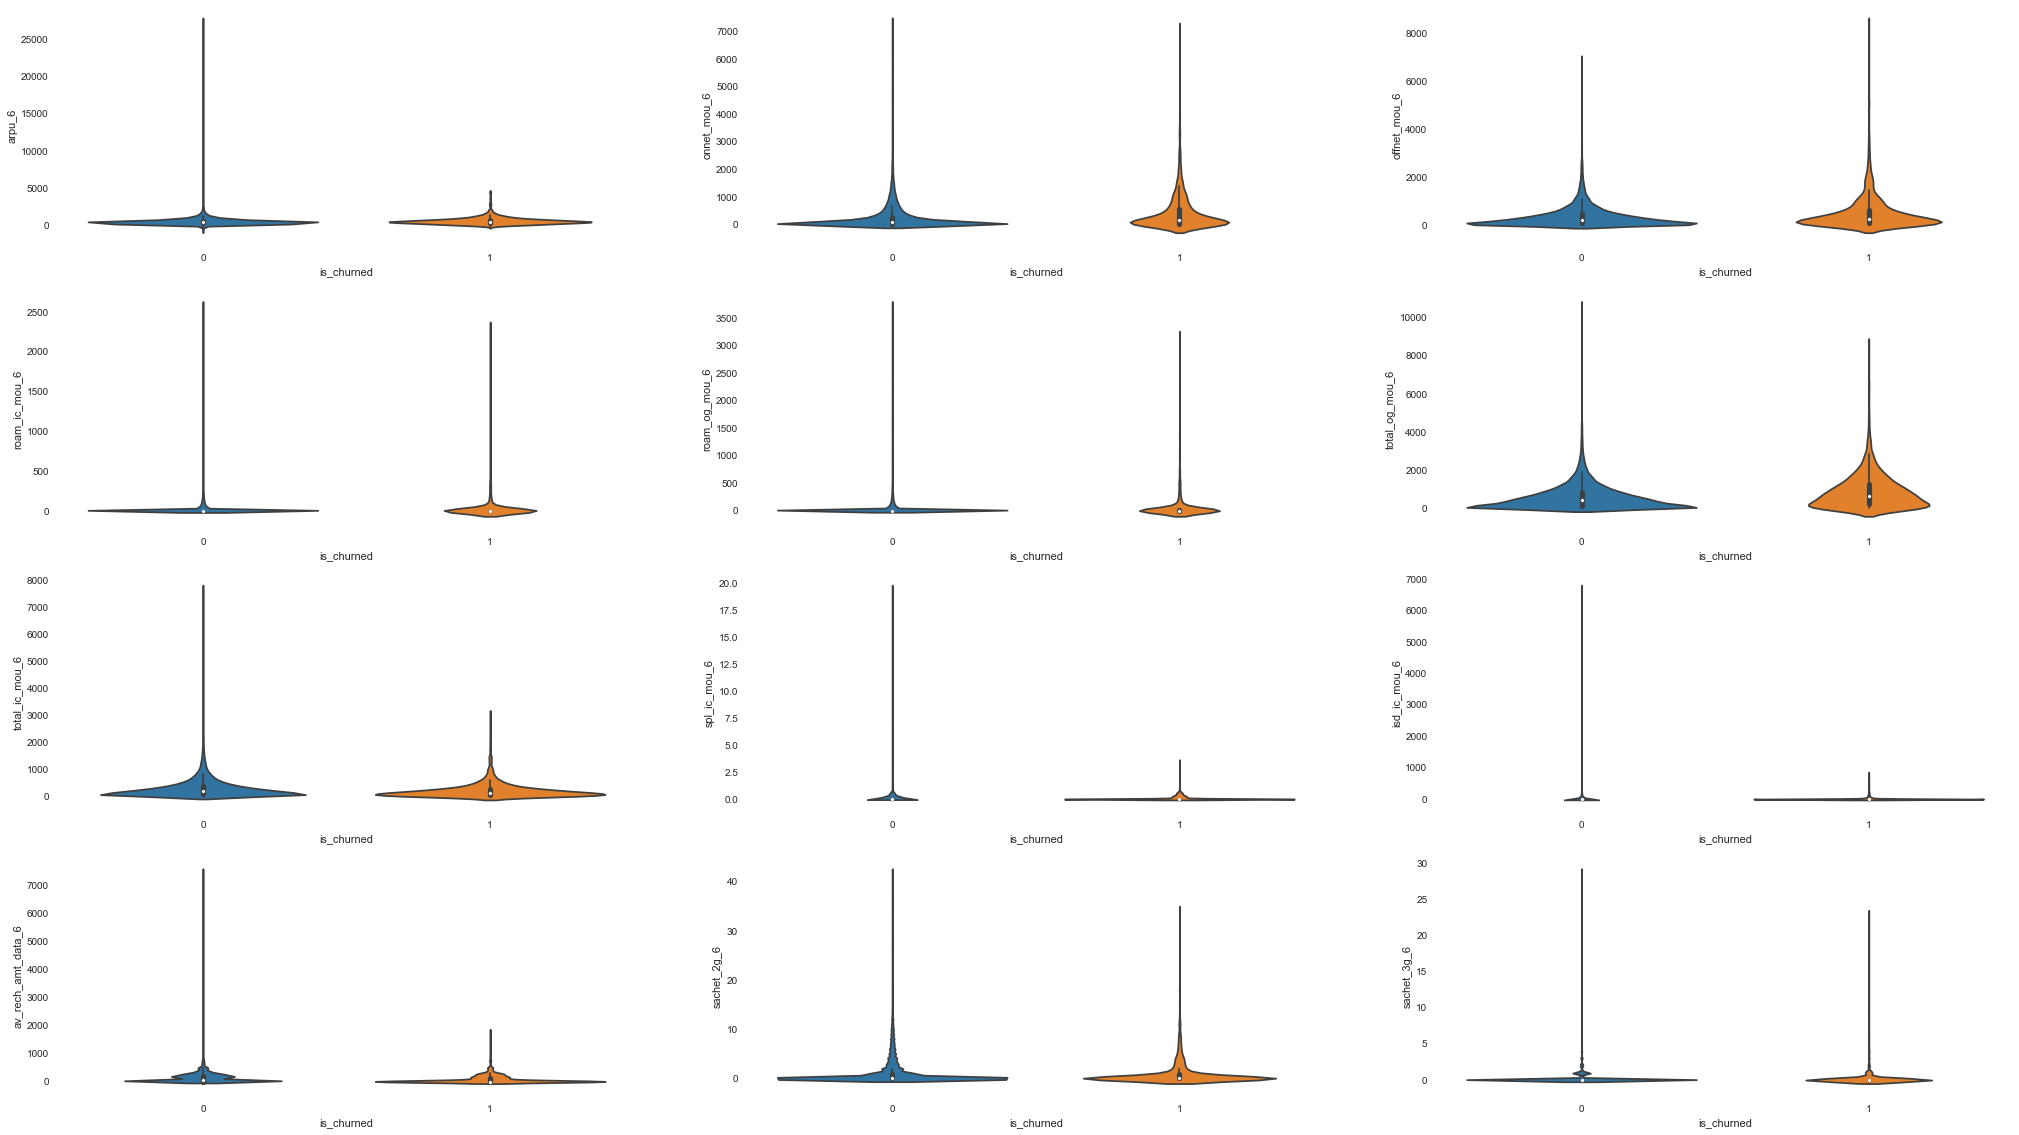

In [ ]:
plt.figure(figsize=(35,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    sns.violinplot(x=Telecom_DF['is_churned'],y=Telecom_DF[sumr_col_lst[i-1]])
plt.show()

observation:-
*   for all the features  distribution is more peaked for non churn cases than churn cases.

*   with the exception of few features , non churn cases has elongated distribution than churn cases.

## Deriving new Features

<b>Date column is converted into continous month_day , week_day column to derive any insights that are periodic</b>

In [ ]:
Telecom_DF['month_day_of_last_rech_6']=Telecom_DF['date_of_last_rech_6'].dt.day
Telecom_DF['month_day_of_last_rech_7']=Telecom_DF['date_of_last_rech_7'].dt.day
Telecom_DF['month_day_of_last_rech_8']=Telecom_DF['date_of_last_rech_8'].dt.day

Telecom_DF['week_day_of_last_rech_6']=Telecom_DF['date_of_last_rech_6'].dt.weekday
Telecom_DF['week_day_of_last_rech_7']=Telecom_DF['date_of_last_rech_7'].dt.weekday
Telecom_DF['week_day_of_last_rech_8']=Telecom_DF['date_of_last_rech_8'].dt.weekday

Telecom_DF.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

<b>Below variables are derived based on assumption that it is possible to identify the person who tends through their usage metrics each month</b>

In [ ]:
#cat_col_lst=['is_churned','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','monthly_2g_6',
#'monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','week_day_of_last_rech_6','week_day_of_last_rech_7','week_day_of_last_rech_8']

cat_col_lst=['is_churned','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

<b>Deriving list of individual property in Data Frame without taking months into account</b>

In [ ]:
raw_list=[x.replace('6','') for x in Telecom_DF.columns if '6' in x and x not in cat_col_lst]

<b>For each property, difference between its Good Phase and action phase is derived</b>

Note:-the columns are dervied based on assumption that a customer is likely to lessen his usage if he is about to churn

In [ ]:
for col in raw_list:
    Telecom_DF[col+'Good_phs']=(Telecom_DF[col+'6']+Telecom_DF[col+'7'])
    Telecom_DF[col+'Good_Act_diff']=(Telecom_DF[col+'8']-Telecom_DF[col+'Good_phs'])

<b>Deriving list of continuous columns</b>

In [ ]:
cont_col_lst=[col for col in Telecom_DF.columns if col not in cat_col_lst]

<b>Adding a column with constant 1 to account for bias in the dataset</b>

In [ ]:
Telecom_DF = sm.add_constant(Telecom_DF,has_constant='add')
Telecom_DF.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_phs_1,is_churned,month_day_of_last_rech_6,month_day_of_last_rech_7,month_day_of_last_rech_8,week_day_of_last_rech_6,week_day_of_last_rech_7,week_day_of_last_rech_8,arpu_Good_phs,arpu_Good_Act_diff,onnet_mou_Good_phs,onnet_mou_Good_Act_diff,offnet_mou_Good_phs,offnet_mou_Good_Act_diff,roam_ic_mou_Good_phs,roam_ic_mou_Good_Act_diff,roam_og_mou_Good_phs,roam_og_mou_Good_Act_diff,loc_og_t2t_mou_Good_phs,loc_og_t2t_mou_Good_Act_diff,loc_og_t2m_mou_Good_phs,loc_og_t2m_mou_Good_Act_diff,loc_og_t2f_mou_Good_phs,loc_og_t2f_mou_Good_Act_diff,loc_og_t2c_mou_Good_phs,loc_og_t2c_mou_Good_Act_diff,loc_og_mou_Good_phs,loc_og_mou_Good_Act_diff,std_og_t2t_mou_Good_phs,std_og_t2t_mou_Good_Act_diff,std_og_t2m_mou_Good_phs,std_og_t2m_mou_Good_Act_diff,std_og_t2f_mou_Good_phs,std_og_t2f_mou_Good_Act_diff,std_og_mou_Good_phs,std_og_mou_Good_Act_diff,isd_og_mou_Good_phs,isd_og_mou_Good_Act_diff,spl_og_mou_Good_phs,spl_og_mou_Good_Act_diff,og_others_Good_phs,og_others_Good_Act_diff,total_og_mou_Good_phs,total_og_mou_Good_Act_diff,loc_ic_t2t_mou_Good_phs,loc_ic_t2t_mou_Good_Act_diff,loc_ic_t2m_mou_Good_phs,loc_ic_t2m_mou_Good_Act_diff,loc_ic_t2f_mou_Good_phs,loc_ic_t2f_mou_Good_Act_diff,loc_ic_mou_Good_phs,loc_ic_mou_Good_Act_diff,std_ic_t2t_mou_Good_phs,std_ic_t2t_mou_Good_Act_diff,std_ic_t2m_mou_Good_phs,std_ic_t2m_mou_Good_Act_diff,std_ic_t2f_mou_Good_phs,std_ic_t2f_mou_Good_Act_diff,std_ic_mou_Good_phs,std_ic_mou_Good_Act_diff,total_ic_mou_Good_phs,total_ic_mou_Good_Act_diff,spl_ic_mou_Good_phs,spl_ic_mou_Good_Act_diff,isd_ic_mou_Good_phs,isd_ic_mou_Good_Act_diff,ic_others_Good_phs,ic_others_Good_Act_diff,total_rech_num_Good_phs,total_rech_num_Good_Act_diff,total_rech_amt_Good_phs,total_rech_amt_Good_Act_diff,max_rech_amt_Good_ph

<b>Treating the Dataset for outliers</b>

In [ ]:
lwr_bnd = Telecom_DF.quantile(0.01)
upr_bnd = Telecom_DF.quantile(0.99)
IQR = upr_bnd - lwr_bnd
IQR
Telecom_DF=Telecom_DF[~((Telecom_DF < (lwr_bnd - 1.5 * IQR)) |(Telecom_DF > (upr_bnd + 1.5 * IQR))).any(axis=1)] #ask rohit

<b>Create Dummy columns for categorical variable</b>

In [ ]:
Telecom_DF[cat_col_lst]=Telecom_DF[cat_col_lst].astype('category')
Telecom_DF=pd.get_dummies(Telecom_DF,prefix=[x for x in cat_col_lst if 'is_churned' not in x],columns=[x for x in cat_col_lst if 'is_churned' not in x])

Telecom_DF.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_phs_1,is_churned,month_day_of_last_rech_6,month_day_of_last_rech_7,month_day_of_last_rech_8,week_day_of_last_rech_6,week_day_of_last_rech_7,week_day_of_last_rech_8,arpu_Good_phs,arpu_Good_Act_diff,onnet_mou_Good_phs,onnet_mou_Good_Act_diff,offnet_mou_Good_phs,offnet_mou_Good_Act_diff,roam_ic_mou_Good_phs,roam_ic_mou_Good_Act_diff,roam_og_mou_Good_phs,roam_og_mou_Good_Act_diff,loc_og_t2t_mou_Good_phs,loc_og_t2t_mou_Good_Act_diff,loc_og_t2m_mou_Good_phs,loc_og_t2m_mou_Good_Act_diff,loc_og_t2f_mou_Good_phs,loc_og_t2f_mou_Good_Act_diff,loc_og_t2c_mou_Good_phs,loc_og_t2c_mou_Good_Act_diff,loc_og_mou_Good_phs,loc_og_mou_Good_Act_diff,std_og_t2t_mou_Good_phs,std_og_t2t_mou_Good_Act_diff,std_og_t2m_mou_Good_phs,std_og_t2m_mou_Good_Act_diff,std_og_t2f_mou_Good_phs,std_og_t2f_mou_Good_Act_diff,std_og_mou_Good_phs,std_og_mou_Good_Act_diff,isd_og_mou_Good_phs,isd_og_mou_Good_Act_diff,spl_og_mou_Good_phs,spl_og_mou_Good_Act_diff,og_others_Good_phs,og_others_Good_Act_diff,total_og_mou_Good_phs,total_og_mou_Good_Act_diff,loc_ic_t2t_mou_Good_phs,loc_ic_t2t_mou_Good_Act_diff,loc_ic_t2m_mou_Good_phs,loc_ic_t2m_mou_Good_Act_diff,loc_ic_t2f_mou_Good_phs,loc_ic_t2f_mou_Good_Act_diff,loc_ic_mou_Good_phs,loc_ic_mou_Good_Act_diff,std_ic_t2t_mou_Good_phs,std_ic_t2t_mou_Good_Act_diff,std_ic_t2m_mou_Good_phs,std_ic_t2m_mou_Good_Act_diff,std_ic_t2f_mou_Good_phs,std_ic_t2f_mou_Good_Act_diff,std_ic_mou_Good_phs,std_ic_mou_Good_Act_diff,total_ic_mou_Good_phs,total_ic_mou_Good_Act_diff,spl_ic_mou_Good_phs,spl_ic_mou_Good_Act_diff,isd_ic_mou_Good_phs,isd_ic_mou_Good_Act_diff,ic_others_Good_phs,ic_others_Good_Act_diff,total_rech_num_Good_phs,total_rech_num_Good_Act_diff,total_rech_amt_Good_phs,total_rech_amt_Good_Act_diff,max_rech_amt_Good_phs,max_rech_amt_Good_Act_diff,last_day_rch_amt_Good_phs,last_day_rch_amt_Good_Act_

<b>Dividing Dataset into test and train set</b>

In [ ]:
train, test = train_test_split(Telecom_DF, train_size = 0.8, test_size = 0.2, random_state = 10)

print('Train set row count {}'.format(len(train)))
print('Train set row count {}'.format(len(test)))

Train set row count 20639
Train set row count 5160


train | test  - train | test Data Frame

<b>Separating dependant and predictor variable</b>

In [ ]:
# divide into X_train, y_train, X_test, y_test
y_train = train.pop('is_churned')
X_train = train

y_test = test.pop('is_churned')
X_test = test

X_train | X_test - predictor dataset 

y_train | y_test - dependant variable

<b>Standardising values in the dataset</b>

In [ ]:
scaler = StandardScaler()
X_train[cont_col_lst] = scaler.fit_transform(X_train[cont_col_lst])
X_test[cont_col_lst] = scaler.transform(X_test[cont_col_lst])
X_train.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_phs_1,month_day_of_last_rech_6,month_day_of_last_rech_7,month_day_of_last_rech_8,week_day_of_last_rech_6,week_day_of_last_rech_7,week_day_of_last_rech_8,arpu_Good_phs,arpu_Good_Act_diff,onnet_mou_Good_phs,onnet_mou_Good_Act_diff,offnet_mou_Good_phs,offnet_mou_Good_Act_diff,roam_ic_mou_Good_phs,roam_ic_mou_Good_Act_diff,roam_og_mou_Good_phs,roam_og_mou_Good_Act_diff,loc_og_t2t_mou_Good_phs,loc_og_t2t_mou_Good_Act_diff,loc_og_t2m_mou_Good_phs,loc_og_t2m_mou_Good_Act_diff,loc_og_t2f_mou_Good_phs,loc_og_t2f_mou_Good_Act_diff,loc_og_t2c_mou_Good_phs,loc_og_t2c_mou_Good_Act_diff,loc_og_mou_Good_phs,loc_og_mou_Good_Act_diff,std_og_t2t_mou_Good_phs,std_og_t2t_mou_Good_Act_diff,std_og_t2m_mou_Good_phs,std_og_t2m_mou_Good_Act_diff,std_og_t2f_mou_Good_phs,std_og_t2f_mou_Good_Act_diff,std_og_mou_Good_phs,std_og_mou_Good_Act_diff,isd_og_mou_Good_phs,isd_og_mou_Good_Act_diff,spl_og_mou_Good_phs,spl_og_mou_Good_Act_diff,og_others_Good_phs,og_others_Good_Act_diff,total_og_mou_Good_phs,total_og_mou_Good_Act_diff,loc_ic_t2t_mou_Good_phs,loc_ic_t2t_mou_Good_Act_diff,loc_ic_t2m_mou_Good_phs,loc_ic_t2m_mou_Good_Act_diff,loc_ic_t2f_mou_Good_phs,loc_ic_t2f_mou_Good_Act_diff,loc_ic_mou_Good_phs,loc_ic_mou_Good_Act_diff,std_ic_t2t_mou_Good_phs,std_ic_t2t_mou_Good_Act_diff,std_ic_t2m_mou_Good_phs,std_ic_t2m_mou_Good_Act_diff,std_ic_t2f_mou_Good_phs,std_ic_t2f_mou_Good_Act_diff,std_ic_mou_Good_phs,std_ic_mou_Good_Act_diff,total_ic_mou_Good_phs,total_ic_mou_Good_Act_diff,spl_ic_mou_Good_phs,spl_ic_mou_Good_Act_diff,isd_ic_mou_Good_phs,isd_ic_mou_Good_Act_diff,ic_others_Good_phs,ic_others_Good_Act_diff,total_rech_num_Good_phs,total_rech_num_Good_Act_diff,total_rech_amt_Good_phs,total_rech_amt_Good_Act_diff,max_rech_amt_Good_phs,max_rech_amt_Good_Act_diff,last_day_rch_amt_Good_phs,last_day_rch_amt_Good_Act_diff,total_

# Prediction Section

<b>Seed is intialized for result reproducibility</b>

In [ ]:
seed = np.random.seed(22)

<b>Creating new variable to store data derived from PCA</b>

In [ ]:
X_train_pred=X_train.copy()
X_test_pred=X_test.copy()

X_train_pred - train data frame used for prediction

X_test_pred -  test data frame used for prediction

<b>PCA object is created such that it retains 95% of information of original dataset</b>

In [ ]:
pca = PCA(random_state=42,n_components=0.95)

pca - principle component analysis object

<b>new normalized data set is created for both train and test dats</b>

In [ ]:
norm_data=pca.fit_transform(X_train_pred[cont_col_lst])
norm_DF=pd.DataFrame(norm_data)

norm_data_test=pca.transform(X_test_pred[cont_col_lst])
norm_DF_test=pd.DataFrame(norm_data_test)

norm_data - normalized trained Data

norm_DF - normalized trained DataFrame

norm_data_test - normalized test Data

norm_DF_test - normalized test DataFrame

In [ ]:
len(pca.components_)

71

<b>Index of the dataset is dropped and normalized data is merged with original dataset</b><br><br>
note : old columns are replaced with new columns and new ones are named as pca_0,pca_1,... and so on

In [ ]:
#Train Data
X_train_pred.reset_index(drop=True,inplace=True)
norm_DF.reset_index(drop=True,inplace=True)

X_train_pred.drop(cont_col_lst,inplace=True,axis=1)
X_train_pred=pd.concat([X_train_pred,norm_DF],axis=1)

X_train_pred.columns=['pca_'+str(x) for x in range(len(X_train_pred.columns))]


#Test Data
X_test_pred.reset_index(drop=True,inplace=True)
norm_DF_test.reset_index(drop=True,inplace=True)

X_test_pred.drop(cont_col_lst,inplace=True,axis=1)
X_test_pred=pd.concat([X_test_pred,norm_DF_test],axis=1)

X_test_pred.columns=['pca_'+str(x) for x in range(len(X_test_pred.columns))]

<b>Total count of columns after P.C.A</b>

In [ ]:
len(X_train_pred.columns)

90

In [ ]:
X_train_pred.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89
0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,-2.239419,0.042783,-4.068361,-1.926369,-2.515551,0.144640,-0.653160,-0.291791,1.650161,0.045501,1.890469,0.409100,0.131235,0.585337,-0.213578,-0.028362,-0.514498,-0.178730,0.203130,-0.835506,0.278418,-0.552835,-0.614154,0.020520,0.301212,-0.558944,-0.106685,-0.532278,-0.279139,-0.056819,0.240718,0.774912,-0.357182,-0.781582,-0.273494,1.129053,0.440603,0.309315,0.805263,0.883423,0.488266,-0.541319,0.029467,-0.113089,-0.302075,0.163514,-0.305858,0.348643,-0.325043,0.472551,0.872278,1.649925,0.629416,-0.226913,0.312370,-0.507776,-0.766415,-0.185940,0.129572,-0.103104,-0.212291,0.163391,0.141252,-0.092803,-0.166199,-0.238175,-0.169016,0.025635,-0.481393,-0.198806,-0.297655
1,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,-0.439969,-2.629592,-2.299839,-2.960922,-1.713793,0.937514,-0.798082,-0.336156,1.529992,1.075928,-0.498570,0.915337,-0.816235,0.414981,-0.863657,-0.357949,-1.121691,0.721658,-0.423776,-1.039836,-0.285024,-1.585195,0.777418,0.215530,0.104367,0.416149,0.183098,-0.543639,-0.881233,-1.058451,2.303318,-0.294088,-0.594563,-1.104433,0.019023,0.410549,-0.604162,0.000473,0.029158,0.098346,0.024607,0.302784,-0.084288,-0.491170,-0.228565,0.876287,0.106958,0.390661,0.289678,-0.404316,0.449632,-0.655892,0.243021,-0.323104,-0.262196,-0.238904,0.211147,0.368328,-0.612749,0.507127,0.030484,0.551018,-0.058354,-0.121579,0.338670,-0.584575,-0.324046,0.491826,0.070528,-0.059035,0.220014
2,1.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,4.659660,-3.030164,-1.586236,-3.197812,-0.779401,0.139804,-1.160342,0.336070,-0.542467,-0.688832,0.205737,0.529804,-0.064126,-1.231314,0.608880,-2.069560,0.135839,-0.219634,-0.411648,3.906238,-0.068663,-2.292625,-1.506955,-2.067631,-1.342304,1.182137,0.008436,-1.901094,1.819527,0.584277,-1.637242,-0.059570,-0.099609,0.234386,-0.118433,0.267311,-0.183754,-0.357520,-0.835650,0.126366,-0.591849,0.805216,-0.260847,-0.303463,1.456983,-1.231482,-0.314121,-1.001811,-0.576251,0.252441,-0.121938,-0.228620,-0.561081,0.576463,0.876600,0.602909,-2.252646,2.341665,-3.272651,1.340040,-2.010114,0.821648,0.931804,0.483256,0.867988,-0.752132,0.622828,0.685640,1.650257,0.232018,1.616330
3,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,-3.279733,-5.244036,2.760011,-0.222733,-0.732329,3.652345,-2.584685,-1.924908,-0.327589,-0.370473,0.056399,0.085387,0.132389,0.061676,-1.157798,0.667958,1.427058,1.578091,1.459681,-0.366953,0.530408,-0.653710,-1.352206,0.102097,-0.041654,-0.691197,0.220608,-0.516989,-0.508646,-0.315589,0.211304,-1.639967,0.462307,0.982744,0.719481,0.134002,0.100411,-0.236422,0.016558,-0.041716,-0.125157,-0.544669,0.309510,-0.124264,-0.215565,0.068202,-0.037805,-0.159760,0.100862,0.597501,-0.747398,0.313948,0.493116,-0.141984,-0.529202,0.289362,0.377499,-0.114259,-0.347840,0.064873,0.103852,0.210299,-0.020083,-0.069976,0.035537,0.303980,-0.017167,0.024425,0.156707,-0.051181,0.080165
4,1.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,8.842684,-7.062104,-1.855699,8.170541,1.098912,1.041597,4.378218,-0.046142,-1.743408,1.438951,1.784865,-1.466115,0.987694,2.296237,-0.550706,1.728882,-0.705479,-0.649609,-0.432776,-1.031541,1.513557,-1.553776,-1.109005,1.495117,-0.439488,4.269754,1.933310,3.101008,0.900045,0.512319,-0.779422,-0.016351,-2.043969,-1.009514,0.235838,0.849544,0.094700,-0.977727,-0.357102,0.317018,-0.190834,0.321467,-0.461678,-0.336432,0.084539,0.296299,4.553223,-0.524192,0.308750

### Evaluation Metrics

<b>Here we are using Accuracy and Recall(Sensitivity) as the evaluation matrics</b>

<b>we are using Recall because we are more intrested in Positive class(customer who churn) than the negative class and Recall is the measure of measure of positive class that are predicted correctly</b>

<b>&emsp;&emsp;Recall / Sensitivity = TP / (TP+FP)</b>

<b>Along with recall we are also using Accuracy as a metrics to get a good model in overall prediction</b>

<b>&emsp;&emsp;Accuracy = No. of correct prediction / Total no of prediction</b>


### Handling Class imbalance

<b>In Random forest and Ridge Regression class imbalance is handled by passing "balanced" keyword to the argument class_weight</b>

<b>In XGboost, it is handled by passing count(negtive class)/count(positive class) ratio to sample_pos_weight argument</b>

### Random forest

<b>creating a Random Forest object and tested with a range for hyperparameters value to find the optimal one</b>

In [ ]:

params = {'n_estimators': [10,20,40,60,85,100,120],
    'max_depth':[4,6,8,10],
    'min_samples_split':[2,5,9,12,17,20,25],
    'min_samples_leaf':[2,5,9,12,17,20],
    'criterion':['gini','entropy'],
    'oob_score':['True','False'],
    'max_features':['sqrt','log2']
}



rfc = RandomForestClassifier(class_weight='balanced',random_state=22)

# cross validation
rnd_fst_cv = RandomizedSearchCV(estimator = rfc, 
                        param_distributions = params, 
                        scoring= 'recall', 
                        cv = 6, 
                        return_train_score=False,
                        verbose = False,
                         n_jobs=-1,
                         random_state=22) 

<b>Fitting the data set to the object to create optimsed model with optimal hyperparameter value.</b>

In [ ]:
rnd_fst_cv.fit(X_train_pred, y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

<b>Displaying the optimal hyperparameter value among the range of value passed</b>

In [ ]:
rnd_fst_cv.best_params_

{'oob_score': 'True',
 'n_estimators': 40,
 'min_samples_split': 17,
 'min_samples_leaf': 12,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'entropy'}

<b>Predicting the output for test Dataset</b>

In [ ]:
 rnd_fst_y_pred = rnd_fst_cv.predict(X_test_pred)

rnd_fst_y_pred - random forest output prediction

<b>Calculating Accuracy and Recall value for the generated model.</b>

In [ ]:
print("Accuracy - ",accuracy_score(y_test,rnd_fst_y_pred))
print("Recall - ",recall_score(y_test,rnd_fst_y_pred))

Accuracy -  0.7848837209302325
Recall -  0.7572815533980582


## XGboost

<b>Scale_pos_weight is calculated as ratio of count of datapoints with negative class to count of datapoints with positive class</b>

Note:- This value is passed as argument to counter data imbalance in the dataset

In [ ]:
scale_pos_weight = y_train.value_counts().iloc[0]/y_train.value_counts().iloc[1]

<b>creating a Xgboost object and tested with a range for hyperparameters value to find the optimal one</b>

In [ ]:
params = {
    'maxdepth':[4,6,8,10],
        'learning_rate': [0.001,.03, 0.05, .07],
        'n_estimators':  [10,20,40,60,85,100,500]}

xgb = XGBClassifier(silent=True,gamma=0.2,nthread=-1,seed=29,n_jobs=-1,scale_pos_weight=scale_pos_weight,
                    random_state=22)

xgb_cv = RandomizedSearchCV(estimator = xgb, 
                        param_distributions = params, 
                        scoring= 'recall', 
                        cv = 6, 
                        return_train_score=False,
                        verbose = False,
                        n_jobs=-1,
                        random_state=22) 

<b>Fitting the data set to the object to create optimsed model with optimal hyperparameter value.</b>

In [ ]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0.2,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=-1,
                                           objective='binary:logistic',
                                           random_state=22, reg_alpha=0,
                                           reg_lambda=1,
                                           scale_pos_weight=18.19906976744186,
                                           seed=29, silent=True, subsample=1,
                        

<b>Predicting the output for test Dataset</b>

In [ ]:
xgb_y_pred = xgb_cv.predict(X_test)

xgb_y_pred - xgboost output prediction

<b>Displaying the optimal hyperparameter value among the range of value passed</b>

In [ ]:
xgb_cv.best_params_

{'n_estimators': 100, 'maxdepth': 4, 'learning_rate': 0.05}

<b>Calculating Accuracy and Recall value for the generated model.</b>

In [ ]:
print("Accuracy - ",accuracy_score(y_test,xgb_y_pred))
print("Recall - ",recall_score(y_test,xgb_y_pred))

Accuracy -  0.881201550387597
Recall -  0.8511326860841424


## Advanced logistic regression

<b>creating a Logistic Regression object and test with a range of hyperparameters value to find the optimal one</b>


In [ ]:

params = {'alpha': [ 0.001,0.02,0.05,0.3,1.0,  3.0,7.0, 13.0, 20.0, 30.0, 50.0, 70.0, 100.0]}


ridge = RidgeClassifier(class_weight='balanced',random_state=22)


ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1) 

<b>Fitting the data set to the object to create optimsed model with optimal hyperparameter value.</b>

In [ ]:
model=ridge_model_cv.fit(X_train_pred, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   10.4s finished


<b>Displaying the optimal hyperparameter value among the range of value passed</b>

In [ ]:
model.best_params_

{'alpha': 70.0}

<b>Predicting the output for test Dataset</b>

In [ ]:
 ridge_y_pred = ridge_model_cv.predict(X_test_pred)

ridge_y_pred - linear regression output prediction

<b>Calculating Accuracy and Recall value for the generated model.</b>

In [ ]:
print("Accuracy",accuracy_score(y_test,ridge_y_pred))
print("Recall",recall_score(y_test,ridge_y_pred))

Accuracy 0.8108527131782945
Recall 0.8252427184466019


# Interpretation Section

<b>Random Forest</b>

<b>Fitting Random Forest object with raw data set to find most influencing variables</b>

In [ ]:
rnd_fst_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

<b>Displaying the optimal hyperparameter value among the range of value passed</b>

In [ ]:
rnd_fst_cv.best_params_

{'oob_score': 'True',
 'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy'}

<b>Predicting the output for test Dataset</b>

In [ ]:
 rnd_fst_y_pred = rnd_fst_cv.predict(X_test)

rnd_fst_y_pred - random forest output prediction

<b>Calculating Accuracy and Recall value for the generated model.</b>

In [ ]:
print("Accuracy - ",accuracy_score(y_test,rnd_fst_y_pred))
print("Recall - ",recall_score(y_test,rnd_fst_y_pred))

Accuracy -  0.9044573643410853
Recall -  0.7475728155339806


<b>Zipping column namves with its importance</b>

In [ ]:
imp_list=list(zip(X_test.columns,rnd_fst_cv.best_estimator_.feature_importances_))

<b>Sorting the variable based on its importance</b>

In [ ]:
sorted(imp_list,key=lambda x:x[1],reverse=True)

[('loc_ic_t2m_mou_8', 0.07861575522440148),
 ('loc_ic_mou_8', 0.05622267653754857),
 ('total_ic_mou_8', 0.049783075243087296),
 ('roam_ic_mou_8', 0.04365062524180989),
 ('month_day_of_last_rech_8', 0.03959803280600308),
 ('loc_og_t2m_mou_8', 0.033684892553079215),
 ('av_rech_amt_data_8', 0.03352153687256736),
 ('loc_ic_t2t_mou_8', 0.033446113845072574),
 ('month_day_of_last_rech_Good_Act_diff', 0.02745082068514284),
 ('total_rech_amt_data_8', 0.02704632335469078),
 ('last_day_rch_amt_8', 0.026444810193084096),
 ('roam_og_mou_Good_Act_diff', 0.02262150003227626),
 ('total_og_mou_8', 0.02086199096273831),
 ('roam_og_mou_8', 0.020065532648215673),
 ('loc_og_mou_8', 0.01877196908550325),
 ('max_rech_data_8', 0.01820281547635095),
 ('total_rech_amt_Good_Act_diff', 0.016692634862684068),
 ('total_rech_amt_8', 0.016196456715500445),
 ('loc_og_t2f_mou_8', 0.013805686365547475),
 ('week_day_of_last_rech_8', 0.013624770495359623),
 ('arpu_Good_Act_diff', 0.012737970455619835),
 ('vol_3g_mb_8', 0

<b>Logistic Regression</b>

Note:- Here we go for Automated feature selection rather than manual. manual selection is used to select features that are more interpretable than others in business point of view.In out business case all features are related usage of service of customer and are easily interpretable.

<b>Fitting the Logistic regression to the raw dataset</b>

In [ ]:
lm = LogisticRegression(class_weight='balanced',random_state=22)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

<b>Predicting the output for test Dataset</b>

In [ ]:
 log_reg_y_pred = rfe.predict(X_test)

<b>Calculating Accuracy and Recall value for the generated model.</b>

In [ ]:
print("Accuracy - ",accuracy_score(y_test,log_reg_y_pred))
print("Recall - ",recall_score(y_test,log_reg_y_pred))

Accuracy -  0.7666666666666667
Recall -  0.8155339805825242


<b>Zipping column namves with its importance</b>

In [ ]:
imp_list=list(zip(X_train.columns,rfe.support_,rfe.ranking_))

<b>Sorting the variable based on its importance</b>

In [ ]:
sorted(imp_list,key=lambda x:x[2],reverse=False)

[('total_ic_mou_8', True, 1),
 ('av_rech_amt_data_8', True, 1),
 ('total_rech_amt_data_8', True, 1),
 ('month_day_of_last_rech_8', True, 1),
 ('offnet_mou_Good_Act_diff', True, 1),
 ('loc_og_t2m_mou_Good_Act_diff', True, 1),
 ('std_og_t2m_mou_Good_Act_diff', True, 1),
 ('total_ic_mou_Good_Act_diff', True, 1),
 ('night_pck_user_6_0.0', True, 1),
 ('fb_user_6_NA', True, 1),
 ('total_rech_data_8', False, 2),
 ('fb_user_8_0.0', False, 3),
 ('last_day_rch_amt_8', False, 4),
 ('arpu_8', False, 5),
 ('total_og_mou_8', False, 6),
 ('spl_ic_mou_8', False, 7),
 ('onnet_mou_7', False, 8),
 ('std_og_t2m_mou_8', False, 9),
 ('week_day_of_last_rech_8', False, 10),
 ('aon', False, 11),
 ('night_pck_user_6_NA', False, 12),
 ('monthly_2g_8', False, 13),
 ('offnet_mou_8', False, 14),
 ('roam_og_mou_8', False, 15),
 ('arpu_2g_Good_Act_diff', False, 16),
 ('av_rech_amt_data_6', False, 17),
 ('fb_user_7_0.0', False, 18),
 ('loc_ic_t2f_mou_6', False, 19),
 ('std_og_t2t_mou_7', False, 20),
 ('loc_og_t2t_mou_

collinearity are removed only when checking VIF and p value

## Decision tree

<b>Fitting the decision tree to the raw dataset</b>

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=5,random_state=22)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

<b>Predicting for test dataset and calculating its Accuracy and Recall</b>

In [ ]:
dec_tree_y_pred = dec_tree.predict(X_test)
print(accuracy_score(y_test,dec_tree_y_pred))
print(recall_score(y_test,dec_tree_y_pred))

0.9470930232558139
0.313915857605178


dec_tree_y_pred - decision tree output prediction

<b>Zipping column namves with its importance</b>

In [ ]:
imp_list=list(zip(X_test.columns,rnd_fst_cv.best_estimator_.feature_importances_))

<b>Sorting the variable based on its importance</b>

In [ ]:
sorted(imp_list,key=lambda x:x[1],reverse=True)

[('loc_ic_t2m_mou_8', 0.07861575522440148),
 ('loc_ic_mou_8', 0.05622267653754857),
 ('total_ic_mou_8', 0.049783075243087296),
 ('roam_ic_mou_8', 0.04365062524180989),
 ('month_day_of_last_rech_8', 0.03959803280600308),
 ('loc_og_t2m_mou_8', 0.033684892553079215),
 ('av_rech_amt_data_8', 0.03352153687256736),
 ('loc_ic_t2t_mou_8', 0.033446113845072574),
 ('month_day_of_last_rech_Good_Act_diff', 0.02745082068514284),
 ('total_rech_amt_data_8', 0.02704632335469078),
 ('last_day_rch_amt_8', 0.026444810193084096),
 ('roam_og_mou_Good_Act_diff', 0.02262150003227626),
 ('total_og_mou_8', 0.02086199096273831),
 ('roam_og_mou_8', 0.020065532648215673),
 ('loc_og_mou_8', 0.01877196908550325),
 ('max_rech_data_8', 0.01820281547635095),
 ('total_rech_amt_Good_Act_diff', 0.016692634862684068),
 ('total_rech_amt_8', 0.016196456715500445),
 ('loc_og_t2f_mou_8', 0.013805686365547475),
 ('week_day_of_last_rech_8', 0.013624770495359623),
 ('arpu_Good_Act_diff', 0.012737970455619835),
 ('vol_3g_mb_8', 0

# Results:-

### Prediction:-
<b>We have generated 3 models based Random Forest , XGboost and Linear Regression with ridge regularistion for churn prediction.Among the three models XGboost is the most suited one with Accuracy of 88.12% and with 85.11% sensitivity (recall score) towards prediction </b>

### Interpretation:-
<b>For interpretation model is build based on Random Forest ,Decision tree and Logistic Regression on the original data set for which dimensionality reduction process has been carried out.<br>
&ensp;&ensp;&ensp; Top 10 important features has been listed below, order in which it is listed is based on Random Forest / Decision tree's prediction ,Since Random Forest / Decision trees handle non linearity well and is more suited when number of features is high.

Top 10 features:-(for more feature list see interpretation section)
* 'loc_ic_t2m_mou_8'
* 'loc_ic_mou_8'
* 'total_ic_mou_8'
* 'roam_ic_mou_8'
* 'month_day_of_last_rech_8'
* 'loc_og_t2m_mou_8'
* 'av_rech_amt_data_8'
* 'loc_ic_t2t_mou_8'
* 'month_day_of_last_rech_Good_Act_diff'
* 'total_rech_amt_data_8'


Recommendation to the operator (all the feature recommendation mentioned below are for action phase):-

* Minutes of usage of local incoming call to other operator is the most important indicator for churn.if the usage value of customer tend to be low then he is more likely to churn.

* Listed below incoming call features that are ordered in decreasing order of importance , for all the features less the value more likely the customer is to leave.
    * Local incoming call minutes of usage (aggregated column)
    * Total incoming call minutes of usage (aggregated column)
    * Roam incoming call minutes of usage

* Last day in the month on when customer recharged ,more recent the customer has recharged less likely he is to leave.

* Local outgoing call to other operator minutes of usage . more minutes of usage, less likely he is to leave the operator
    
* Listed down are other features , whose low value indicates that a customer is likely to churn and action needed to be taken to retain customer,
    * Average recharge amount for data
    * Local incoming call to within the operator minutes of usage
    * Local incoming call from fixed line minutes of usage
    * Difference in last recharge of action phase month and good phase month
    * Total data recharge amount
* As such , conclusion can be arrived upon for other columns that has less importance. </b>